# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ari Dwiningsih
- **Email:** m200d4kx1594@bangkit.academy
- **ID Dicoding:** aridwiningsih


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?
- Pertanyaan 2: Bagaimana tren penggunaan sepeda dalam satu tahun dan tahun manakah yang lebih unggul?

## Import Semua Packages/Library yang Digunakan

Sebelum memulai proyek, kita akan memanggil semua library yang dibutuhkan dalam pengerjaan proyek.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Pada tahap ini kita akan mengumpulkan semua data yang dibutuhkan. Oleh karena saya memilih data 'Bike Sharing', maka saya akan memuat file *day.csv* dan *hour.csv*.

**Memuat Day Dataset**  
    Data dari tabel day akan dimuat menjadi sebuah DataFrame bernama *day_df*.

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Memuat Hour Dataset**  
 Data dari tabel hour akan dimuat menjadi sebuah DataFrame bernama *hour_df*.

In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Setelah melakukan gathering data kita akan melakukan penilaian terhadap keseluruhan kualitas data yang akan digunakan. Penilaian ini dilakukan dengan tujuan untuk mengidentifikasi berbagai masalah yang mungkin ada dalam dataset tersebut.

### Menilai Day Dataset

1. Memeriksa tipe data dari tiap kolom yang terdapat dalam data day_df.

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Perhatikan bahwa terdapat kesalahan tipe untuk kolom dteday. Kolom tersebut seharusnya direpresentasikan dalam format **datetime**.

2. Memeriksa apakah terdapat missing value pada data day_df.

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari hasil tersebut, dapat disimpulkan bahwa tidak ada missing value pada data day_df.

3. Memeriksa apakah terdapat duplikasi dalam data day_df.

In [6]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


Tidak terdapat duplikasi dalam data day_df.

4. Memeriksa parameter statistik dari kolom numerik yang terdapat dalam data day_df.

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai Hour Dataset

1. Memeriksa tipe data dari tiap kolom yang terdapat dalam data hour_df.

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Perhatikan bahwa terdapat kesalahan tipe untuk kolom dteday. Kolom tersebut seharusnya direpresentasikan dalam format **datetime**.

2. Memeriksa apakah terdapat missing value pada data hour_df.

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari hasil tersebut, dapat disimpulkan bahwa tidak ada missing value pada data hour_df.

3. Memeriksa apakah terdapat duplikasi dalam data hour_df.

In [10]:
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())

Jumlah Duplikasi:  0


Tidak terdapat duplikasi dalam data day_df.

4. Memeriksa parameter statistik dari kolom numerik yang terdapat dalam data hour_df.

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### Day Dataset

In [12]:
# Mengubah judul (keterangan) pada kolom
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'hum': 'humidity',
    'cnt': 'count',    
}, inplace=True)

In [13]:
# Mengubah angka menjadi keterangan
day_df['year'].replace({0: 2011, 1: 2012}, inplace=True)

day_df['month'].replace({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}, inplace=True)

day_df['weekday'].replace({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}, inplace=True)

day_df['season'].replace({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}, inplace=True)

day_df['weather_cond'].replace({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain'
}, inplace=True)

In [14]:
# Mengubah tipe data object ke datetime
day_df['date'] = pd.to_datetime(day_df.date)

# Mengubah tipe data menjadi kategori
columns = ['season', 'year', 'month', 'weekday', 'holiday', 'workingday', 'weather_cond']

for column in columns:
    day_df[columns] = day_df[columns].astype('category')
    # Menambahkan komentar untuk menjelaskan bahwa tipe data kolom telah diubah
    print(f"Tipe data kolom {column} telah diubah menjadi kategori.")
    
day_df.head()

Tipe data kolom season telah diubah menjadi kategori.
Tipe data kolom year telah diubah menjadi kategori.
Tipe data kolom month telah diubah menjadi kategori.
Tipe data kolom weekday telah diubah menjadi kategori.
Tipe data kolom holiday telah diubah menjadi kategori.
Tipe data kolom workingday telah diubah menjadi kategori.
Tipe data kolom weather_cond telah diubah menjadi kategori.


,instant,date,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
# Menampilkan tipe data setelah diubah
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   date          731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    category      
 4   month         731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    category      
 7   workingday    731 non-null    category      
 8   weather_cond  731 non-null    category      
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  humidity      731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  count         731 non-null    int64     

### Hour Dataset

In [16]:
# Mengubah judul (keterangan) pada kolom
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_cond',
    'hum': 'humidity',
    'cnt': 'count',    
}, inplace=True)

In [17]:
# Mengubah angka menjadi keterangan
hour_df['year'].replace({0: 2011, 1: 2012}, inplace=True)

hour_df['month'].replace({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}, inplace=True)

hour_df['weekday'].replace({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}, inplace=True)

hour_df['season'].replace({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}, inplace=True)

hour_df['weather_cond'].replace({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain'
}, inplace=True)

In [18]:
# Mengubah tipe data object ke datetime
hour_df['date'] = pd.to_datetime(hour_df.date)

# Mengubah tipe data menjadi kategori
columns = ['season', 'year', 'month', 'weekday', 'holiday', 'workingday', 'weather_cond']

for column in columns:
    hour_df[columns] = hour_df[columns].astype('category')
    # Menambahkan komentar untuk menjelaskan bahwa tipe data kolom telah diubah
    print(f"Tipe data kolom {column} telah diubah menjadi kategori.")
    
hour_df.head()

Tipe data kolom season telah diubah menjadi kategori.
Tipe data kolom year telah diubah menjadi kategori.
Tipe data kolom month telah diubah menjadi kategori.
Tipe data kolom weekday telah diubah menjadi kategori.
Tipe data kolom holiday telah diubah menjadi kategori.
Tipe data kolom workingday telah diubah menjadi kategori.
Tipe data kolom weather_cond telah diubah menjadi kategori.


,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
# Menampilkan tipe data setelah diubah
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   date          17379 non-null  datetime64[ns]
 2   season        17379 non-null  category      
 3   year          17379 non-null  category      
 4   month         17379 non-null  category      
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  category      
 7   weekday       17379 non-null  category      
 8   workingday    17379 non-null  category      
 9   weather_cond  17379 non-null  category      
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  humidity      17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

## Exploratory Data Analysis (EDA)

### Explore Dataset Day

Mengelompokkan penyewa sepeda (*casual* dan *registered*)


In [20]:
# Berdasarkan tahun
day_df.groupby(by="year").agg({
    "casual":"sum",
    "registered":"sum",
    "count": "sum"
})

,casual,registered,count
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


In [21]:
# Berdasarkan bulan
day_df.groupby(by="month").agg({
    "casual":"sum",
    "registered":"sum",
    "count": "sum"
})

,casual,registered,count
month,,,
Apr,60802,208292,269094
Aug,72039,279155,351194
Dec,21693,189343,211036
Feb,14963,136389,151352
Jan,12042,122891,134933
Jul,78157,266791,344948
Jun,73906,272436,346342
Mar,44444,184476,228920
May,75285,256401,331686


Berdasarkan hasil tersebut, dapat disimpulkan bahwa Bulan Agustus merupakan bulan dengan penggunaan sepeda paling tinggi, sementara Bulan Januari merupakan bulan dengan penggunaan sepeda paling rendah.

In [22]:
# Berdasarkan hari
day_df.groupby(by="weekday").agg({
    "casual":"sum",
    "registered":"sum",
    "count": "sum",
}).sort_values(by="count", ascending=False)

,casual,registered,count
weekday,,,
Fri,78238,409552,487790
Thu,61460,423935,485395
Sat,153852,323955,477807
Wed,57319,415729,473048
Tue,57843,411266,469109
Mon,70784,384719,455503
Sun,140521,303506,444027


Hari Jumat adalah hari dengan pengguna sepeda terbanyak jika dibandingkan dengan hari lainnya.

In [23]:
# Berdasarkan musim
day_df.groupby(by="season").agg({
    "casual":"sum",
    "registered":"sum",
    "count": "sum"
}).sort_values(by="count", ascending=False)

,casual,registered,count
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Spring,60622,410726,471348


Pengguna sepeda cenderung melakukan sewa sepeda pada musim gugur (fall).


In [24]:
# Berdasarkan cuaca
day_df.groupby(by="weather_cond").agg({
    "casual":"sum",
    "registered":"sum",
    "count": "sum"
}).sort_values(by="count", ascending=False)

,casual,registered,count
weather_cond,,,
Clear/Partly Cloudy,446346,1811606,2257952
Misty/Cloudy,169776,827082,996858
Light Snow/Rain,3895,33974,37869


Pengguna sepeda cenderung melakukan sewa sepeda pada kondisi cuaca cerah.


### Explore Dataset Hour

Mengelompokkan penyewa sepeda (*casual* dan *registered*)


In [25]:
# Berdasarkan lama penyewaan
hour_df.groupby(by="hour").agg({
    "casual":"sum",
    "registered":"sum",
    "count": "sum"
})

,casual,registered,count
hour,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


Jumlah pengguna sepeda paling banyak pada saat pukul 17:00 dan jumlah paling sedikit pada pukul 04:00. 

In [26]:
# Berdasarkan cuaca
hour_df.groupby(by="weather_cond").agg({
    "casual":"sum",
    "registered":"sum",
    "count": "sum"
}).sort_values(by="count", ascending=False)

,casual,registered,count
weather_cond,,,
Clear/Partly Cloudy,462745,1875428,2338173
Misty/Cloudy,134481,661471,795952
Light Snow/Rain,22783,135548,158331
Heavy Rain,8,215,223


Pengguna sepeda cenderung melakukan sewa sepeda pada kondisi cuaca cerah.


In [27]:
# menggabungkan 2 dataset
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="date",
    right_on="date"
)
all_df.head()

,instant_x,date,season_x,year_x,month_x,hour,holiday_x,weekday_x,workingday_x,weather_cond_x,...,weekday_y,workingday_y,weather_cond_y,temp_y,atemp_y,humidity_y,windspeed_y,casual_y,registered_y,count_y
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear/Partly Cloudy,...,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear/Partly Cloudy,...,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear/Partly Cloudy,...,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear/Partly Cloudy,...,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear/Partly Cloudy,...,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985


### RFM Analysis

In [28]:
reccent_date = max(hour_df['date'])
rfm_df = hour_df.groupby('registered').agg({
    'date': lambda x: (reccent_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?

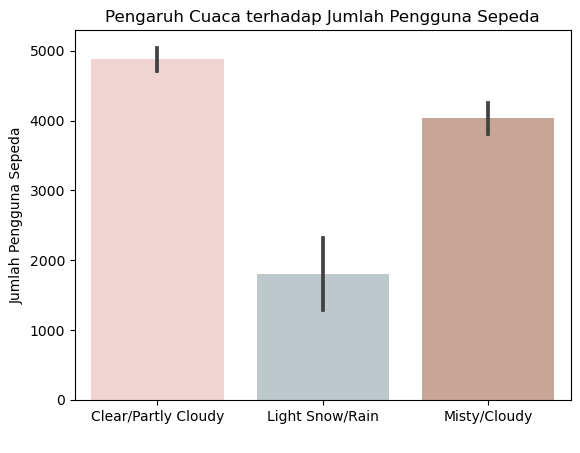

In [29]:
# Daftar warna bar yang akan digunakan
color_list = ["#F4D0D0", "#BAC9CE", "#D1A38C"]

# Membuat bar 
sns.barplot(
    y='count',
    x='weather_cond',
    data=day_df,
    palette=color_list
)

plt.title('Pengaruh Cuaca terhadap Jumlah Pengguna Sepeda')
plt.xlabel(' ')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 2: Bagaimana tren penggunaan sepeda dalam satu tahun dan tahun manakah yang lebih unggul?

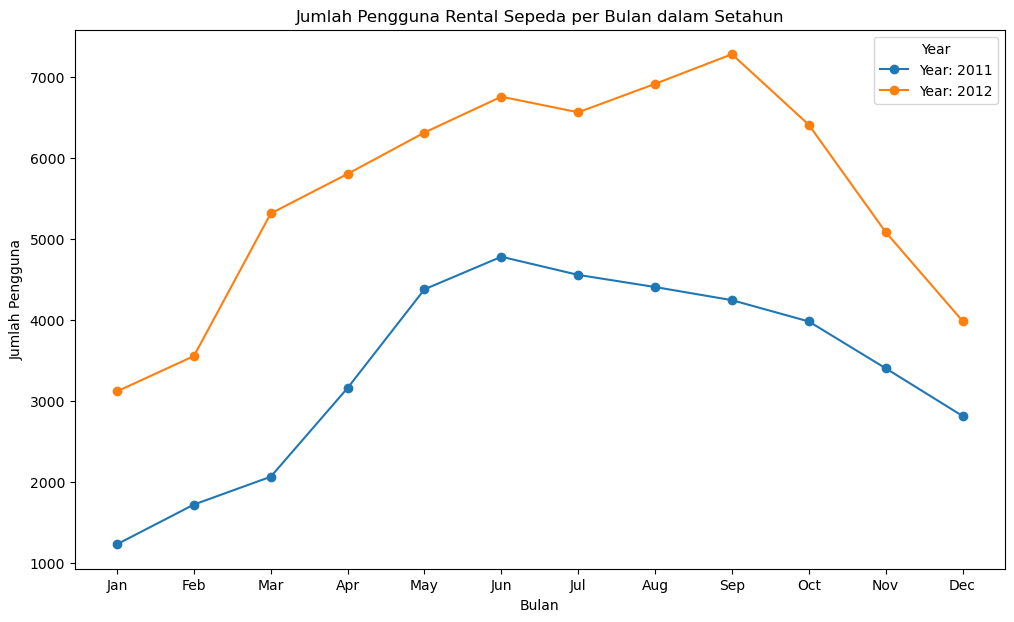

In [30]:
# Mengatur urutan bulan
months_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
day_df['month'] = pd.Categorical(day_df['month'], categories=months_order, ordered=True)

# Mengelompokkan data
grouped_year = day_df.groupby(['year', 'month'])['count'].mean().reset_index(name='counts')

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Loop melalui nilai 'year' yang unik
for year, group in grouped_year.groupby('year'):
    ax.plot(group['month'], group['counts'], marker='o', label=f'Year: {year}')

# Mengatur properti plot
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah Pengguna')
ax.set_title('Jumlah Pengguna Rental Sepeda per Bulan dalam Setahun')

# Menampilkan legenda
plt.legend(title='Year', loc='upper right')

# Menampilkan plot
plt.show()

## Conclusion

- **Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?**
<p>Berdasarkan analisis, dapat disimpulkan bahwa cuaca memiliki pengaruh terhadap jumlah pengguna sepeda. Pada hari-hari dengan cuaca cerah, jumlah pengguna sepeda cenderung meningkat, sementara pada hari-hari dengan salju ringan atau hujan, jumlah pengguna sepeda cenderung menurun. Oleh karena itu, dapat dikatakan bahwa kondisi cuaca memengaruhi jumlah pengguna sepeda secara signifikan.</p><br>

- **Pertanyaan 2: Bagaimana tren penggunaan sepeda dalam satu tahun dan tahun manakah yang lebih unggul?**
<p>Berdasarkan analisis, pada tahun 2011, penggunaan sepeda tertinggi terjadi pada bulan Juni, sementara penggunaan sepeda terendah terjadi pada bulan Januari. Kemudian, pada tahun 2012, penggunaan sepeda tertinggi terjadi pada bulan September, sedangkan penggunaan sepeda terendah kembali terjadi pada bulan Januari. Jika dilihat dari grafik di atas, jumlah pengguna sepeda pada tahun 2012 lebih tinggi daripada tahun 2011.</p>


In [31]:
# Menyimpan fil CSV yang sudah dianalisis
folder_path = "D:/Project/dashboard/"

# Create a list of processed data
df_list = [day_df, hour_df]
file_name = ['dayClean_df.csv', 'hourClean_df.csv']

# Save data to CSV using FOR loop
for df, file in zip(df_list, file_name):
    df.to_csv(f"{folder_path}{file}", index=False)